#Import

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model, ensemble
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor 
from statistics import mean, stdev
from mlxtend.plotting import scatterplotmatrix
import xgboost as xg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from keras import Model
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.patches as mpatches
from keras.callbacks import Callback
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils.vis_utils import plot_model

#General function
Useful function

In [ ]:
city = ['Bari', 'Torino', 'Roma']

#Metrics
def metrics(test, prediction):
  result = []
  result.append(r2_score(test, prediction))
  result.append(sqrt(mean_squared_error(test, prediction)))
  result.append(mean_absolute_error(test, prediction))
  return result

#Define the best HyperParameters
def bestHyper(param_grid, x_train, y_train, model):
  search = GridSearchCV(model, param_grid, cv = 10, scoring='neg_root_mean_squared_error')
  result = search.fit(x_train, y_train)
  mean =  result.cv_results_['mean_test_score']
  params = result.cv_results_['params']
  for mean, params in zip(mean, params):
    print("Mean score: %f, with: %r" % (mean, params))
  print('Best Score: %s' % result.best_score_)
  print('Best Hyperparameters: %s' % result.best_params_)
  print(" ")
  return result

#Predict and return results
def predictAndResults(best, x_test, y_test):
  pred = best.predict(x_test)
  result = metrics(y_test, pred)
  return result

#Print the results
def stampa(arr):
  print("The result of prediction on x_test are:")
  print("Root Mean Squared Error: ", arr[1])
  print("R2: ", arr[0])
  print("Mean Absolute Error: ", arr[2])

#Create CSV
def finalDf(df, df1, df2, name):
  final = pd.DataFrame()
  final = final.append(df)
  final = final.append(df1)
  final = final.append(df2)
  final.to_csv(f"{name}.csv", index = False)
  df = pd.read_csv(f'/content/{name}.csv', delimiter = ',')
  return df

#Clean csv
def preProcessing(df):
  i = df[((df.GHI == 0))].index
  df = df.drop(i)
  df = df.drop(columns = ['Year','Month','Day','Hour', 'Minute','DHI', 'Precipitable Water', 'Dew Point', 'Cloud Type', 'Surface Albedo','Wind Speed','Pressure'])
  df = df.fillna(0)
  return df

#Scalarization
def scalarization(scaler, df):
  tmp = df.drop('GHI', axis = 1)
  scaler.fit(tmp)
  dfTransformed = scaler.transform(tmp)
  return dfTransformed


#Italian Cities
Create data frame for each city with 2017,2018 and 2019.

In [ ]:
#Bari
dfB1 = pd.read_csv('/content/drive/MyDrive/ML/Project/Bari/2017.csv', delimiter = ',')
dfB2 = pd.read_csv('/content/drive/MyDrive/ML/Project/Bari/2018.csv', delimiter = ',')
dfB3 = pd.read_csv('/content/drive/MyDrive/ML/Project/Bari/2019.csv', delimiter = ',')
dfBari = finalDf(dfB1, dfB2, dfB3, "FinaleBari")

#Torino
dfT1 = pd.read_csv('/content/drive/MyDrive/ML/Project/Torino/2017.csv', delimiter = ',')
dfT2 = pd.read_csv('/content/drive/MyDrive/ML/Project/Torino/2018.csv', delimiter = ',')
dfT3 = pd.read_csv('/content/drive/MyDrive/ML/Project/Torino/2019.csv', delimiter = ',')
dfTorino = finalDf(dfT1, dfT2, dfT3, "FinaleTorino")

#Roma
dfR1 = pd.read_csv('/content/drive/MyDrive/ML/Project/Roma/2017.csv', delimiter = ',')
dfR2 = pd.read_csv('/content/drive/MyDrive/ML/Project/Roma/2018.csv', delimiter = ',')
dfR3 = pd.read_csv('/content/drive/MyDrive/ML/Project/Roma/2019.csv', delimiter = ',')
dfRoma = finalDf(dfR1, dfR2, dfR3, "FinaleRoma")

#PreProcessing


1.   Drop the rows with 0 value in GHI columns.
2.   Drop the columns which are not used in the project.
3.   Replace the NaN values with 0.
4.   Scaling the data with Robust Scaler.



In [ ]:
dfBari.head()

,Year,Month,Day,Hour,Minute,Temperature,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed
0,2017,1,1,0,30,6.9,1,1.3,0,0,0,67.28,0.06,1037,0.8,2.3
1,2017,1,1,1,30,6.6,1,1.6,0,0,0,70.47,0.06,1037,0.8,2.5
2,2017,1,1,2,30,6.4,1,1.9,0,0,0,73.17,0.06,1036,0.7,2.6
3,2017,1,1,3,30,6.2,1,2.2,0,0,0,75.36,0.06,1036,0.7,2.6
4,2017,1,1,4,30,6.1,1,2.2,0,0,0,76.27,0.06,1036,0.7,2.6


In [ ]:
Bari = preProcessing(dfBari)
Torino = preProcessing(dfTorino)
Roma = preProcessing(dfRoma)

In [ ]:
scaler = RobustScaler() 

Bari_scaler = scalarization(scaler, Bari)
Torino_scaler = scalarization(scaler, Torino)
Roma_scaler = scalarization(scaler, Roma)

In [ ]:
Bari.head()

,Temperature,DNI,GHI,Relative Humidity
6,7.2,179,17,71.14
7,9.2,602,149,64.89
8,10.8,767,289,58.44
9,12.0,159,227,53.15
10,12.7,250,288,49.86


#Split Data


1.   Assign at y the GHI.
2.   Assign at x the rest.
3.   Split the data into train and test in 70%/30%.
4.   Transform linear data in polynomial data with degree = 3 and do the same split of point 3.



In [ ]:
y_bari = Bari.GHI
x_bari = Bari_scaler
y_torino = Torino.GHI
x_torino = Torino_scaler
y_roma = Roma.GHI
x_roma = Roma_scaler

In [ ]:
print("Bari:", x_bari.shape)
print("Torino:", x_torino.shape)
print("Roma:", x_roma.shape)

Bari: (13031, 3)
Torino: (13031, 3)
Roma: (13081, 3)


In [ ]:
#Standard split
x_trainB, x_testB, y_trainB, y_testB = train_test_split(x_bari,y_bari,test_size=0.3)
x_trainT, x_testT, y_trainT, y_testT = train_test_split(x_torino,y_torino,test_size=0.3)
x_trainR, x_testR, y_trainR, y_testR = train_test_split(x_roma,y_roma,test_size=0.3)

In [ ]:
#Polynomial split
quadratic = PolynomialFeatures(degree = 3)
X_quadBari = quadratic.fit_transform(x_bari)
X_quadTorino = quadratic.fit_transform(x_torino)
X_quadRoma = quadratic.fit_transform(x_roma)

x_trainBQ, x_testBQ, y_trainBQ, y_testBQ = train_test_split(X_quadBari,y_bari,test_size=0.3)
x_trainTQ, x_testTQ, y_trainTQ, y_testTQ = train_test_split(X_quadTorino,y_torino,test_size=0.3)
x_trainRQ, x_testRQ, y_trainRQ, y_testRQ = train_test_split(X_quadRoma,y_roma,test_size=0.3)

#Linear Regression

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
#Bari
resultBariLR = []
model = cross_val_score(lr, x_trainB, y_trainB, scoring = 'neg_root_mean_squared_error',cv = 10)
print("The mean of scores results from cross validation is: %f \n" % mean(model))
modelF = lr.fit(x_trainB, y_trainB)
resultBariLR = predictAndResults(modelF, x_testB, y_testB)
stampa(resultBariLR)

The mean of scores results from cross validation is: -143.490963 

The result of prediction on x_test are:
Root Mean Squared Error:  142.4322931964319
R2:  0.7504895942271452
Mean Absolute Error:  113.76251440870078


In [ ]:
#Bari Polynomial
resultBariLRQ = []
model = cross_val_score(lr, x_trainBQ, y_trainBQ, scoring = 'neg_root_mean_squared_error',cv = 10)
print("The mean of scores results from cross validation is: %f \n" % mean(model))
modelF = lr.fit(x_trainBQ, y_trainBQ)
resultBariLRQ = predictAndResults(modelF, x_testBQ, y_testBQ)
stampa(resultBariLRQ)

The mean of scores results from cross validation is: -124.639224 

The result of prediction on x_test are:
Root Mean Squared Error:  126.47270272069655
R2:  0.8058322029064016
Mean Absolute Error:  94.46391989228424


In [ ]:
#Torino
resultTorinoLR = []
model = cross_val_score(lr, x_trainT, y_trainT, scoring = 'neg_mean_squared_error',cv = 10)
print("The mean of scores results from cross validation is: %f \n" % mean(model))
modelF = lr.fit(x_trainT, y_trainT)
resultTorinoLR = predictAndResults(modelF, x_testT, y_testT)
stampa(resultTorinoLR)

The mean of scores results from cross validation is: -20770.371481 

The result of prediction on x_test are:
Root Mean Squared Error:  141.0525513618096
R2:  0.7597102969071517
Mean Absolute Error:  111.97265151848708


In [ ]:
#Torino Polynomial
resultTorinoLRQ = []
model = cross_val_score(lr, x_trainTQ, y_trainTQ, scoring = 'neg_root_mean_squared_error',cv = 10)
print("The mean of scores results from cross validation is: %f \n" % mean(model))
modelF = lr.fit(x_trainTQ, y_trainTQ)
resultTorinoLRQ = predictAndResults(modelF, x_testTQ, y_testTQ)
stampa(resultTorinoLRQ)

The mean of scores results from cross validation is: -125.759617 

The result of prediction on x_test are:
Root Mean Squared Error:  124.15472291079064
R2:  0.805968897817958
Mean Absolute Error:  93.4420993905124


In [ ]:
#Roma
resultRomaLR = []
model = cross_val_score(lr, x_trainR, y_trainR, scoring = 'neg_root_mean_squared_error',cv = 10)
print("The mean of scores results from cross validation is: %f \n" % mean(model))
modelF = lr.fit(x_trainR, y_trainR)
resultRomaLR = predictAndResults(modelF, x_testR, y_testR)
stampa(resultRomaLR)

The mean of scores results from cross validation is: -145.686852 

The result of prediction on x_test are:
Root Mean Squared Error:  142.95481760329557
R2:  0.742686619542956
Mean Absolute Error:  113.3212568039178


In [ ]:
#Roma Polynomial
resultRomaLRQ = []
model = cross_val_score(lr, x_trainRQ, y_trainRQ, scoring = 'neg_root_mean_squared_error',cv = 10)
print("The mean of scores results from cross validation is: %f \n" % mean(model))
modelF = lr.fit(x_trainRQ, y_trainRQ)
resultRomaLRQ = predictAndResults(modelF, x_testRQ, y_testRQ)
stampa(resultRomaLRQ)

The mean of scores results from cross validation is: -122.760882 

The result of prediction on x_test are:
Root Mean Squared Error:  122.9131551354503
R2:  0.8141245205207273
Mean Absolute Error:  91.5265773983277


#Elastic Net






In [ ]:
en = ElasticNet() 

In [ ]:
param_grid = {
    'l1_ratio': [0.1,0.3,0.5,0.8,1],
    'alpha' : [0.1,0.5,1]
}

In [ ]:
#Bari 
resultBariENQ = []
result = bestHyper(param_grid, x_trainBQ, y_trainBQ, en)
best_randomB = result.best_estimator_

resultBariENQ = predictAndResults(best_randomB, x_testBQ, y_testBQ)
stampa(resultBariENQ)

Mean score: -143.858345, with: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean score: -141.600510, with: {'alpha': 0.1, 'l1_ratio': 0.3}
Mean score: -139.246609, with: {'alpha': 0.1, 'l1_ratio': 0.5}
Mean score: -135.114339, with: {'alpha': 0.1, 'l1_ratio': 0.8}
Mean score: -124.722182, with: {'alpha': 0.1, 'l1_ratio': 1}
Mean score: -172.905106, with: {'alpha': 0.5, 'l1_ratio': 0.1}
Mean score: -166.882524, with: {'alpha': 0.5, 'l1_ratio': 0.3}
Mean score: -159.554484, with: {'alpha': 0.5, 'l1_ratio': 0.5}
Mean score: -145.283261, with: {'alpha': 0.5, 'l1_ratio': 0.8}
Mean score: -126.519299, with: {'alpha': 0.5, 'l1_ratio': 1}
Mean score: -191.570822, with: {'alpha': 1, 'l1_ratio': 0.1}
Mean score: -184.752717, with: {'alpha': 1, 'l1_ratio': 0.3}
Mean score: -176.002770, with: {'alpha': 1, 'l1_ratio': 0.5}
Mean score: -155.754078, with: {'alpha': 1, 'l1_ratio': 0.8}
Mean score: -130.547227, with: {'alpha': 1, 'l1_ratio': 1}
Best Score: -124.72218202206997
Best Hyperparameters: {'alpha': 0.1, 'l

In [ ]:
#Torino
resultTorinoENQ = []
result = bestHyper(param_grid, x_trainTQ, y_trainTQ, en)
best_randomT = result.best_estimator_

resultTorinoENQ = predictAndResults(best_randomT, x_testTQ, y_testTQ)
stampa(resultTorinoENQ)

Mean score: -144.832693, with: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean score: -142.590023, with: {'alpha': 0.1, 'l1_ratio': 0.3}
Mean score: -140.257814, with: {'alpha': 0.1, 'l1_ratio': 0.5}
Mean score: -136.214258, with: {'alpha': 0.1, 'l1_ratio': 0.8}
Mean score: -125.823464, with: {'alpha': 0.1, 'l1_ratio': 1}
Mean score: -174.243912, with: {'alpha': 0.5, 'l1_ratio': 0.1}
Mean score: -168.112704, with: {'alpha': 0.5, 'l1_ratio': 0.3}
Mean score: -160.661814, with: {'alpha': 0.5, 'l1_ratio': 0.5}
Mean score: -146.257292, with: {'alpha': 0.5, 'l1_ratio': 0.8}
Mean score: -127.523068, with: {'alpha': 0.5, 'l1_ratio': 1}
Mean score: -193.207941, with: {'alpha': 1, 'l1_ratio': 0.1}
Mean score: -186.289854, with: {'alpha': 1, 'l1_ratio': 0.3}
Mean score: -177.391506, with: {'alpha': 1, 'l1_ratio': 0.5}
Mean score: -156.805416, with: {'alpha': 1, 'l1_ratio': 0.8}
Mean score: -131.560377, with: {'alpha': 1, 'l1_ratio': 1}
Best Score: -125.82346439038943
Best Hyperparameters: {'alpha': 0.1, 'l

In [ ]:
#Roma
resultRomaENQ = []
result = bestHyper(param_grid, x_trainRQ, y_trainRQ, en)
best_randomR = result.best_estimator_

resultRomaENQ = predictAndResults(best_randomR, x_testRQ, y_testRQ)
stampa(resultRomaENQ)

Mean score: -145.076666, with: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean score: -142.893860, with: {'alpha': 0.1, 'l1_ratio': 0.3}
Mean score: -140.564570, with: {'alpha': 0.1, 'l1_ratio': 0.5}
Mean score: -136.626068, with: {'alpha': 0.1, 'l1_ratio': 0.8}
Mean score: -123.141588, with: {'alpha': 0.1, 'l1_ratio': 1}
Mean score: -170.120725, with: {'alpha': 0.5, 'l1_ratio': 0.1}
Mean score: -165.008320, with: {'alpha': 0.5, 'l1_ratio': 0.3}
Mean score: -158.898584, with: {'alpha': 0.5, 'l1_ratio': 0.5}
Mean score: -146.517155, with: {'alpha': 0.5, 'l1_ratio': 0.8}
Mean score: -126.594993, with: {'alpha': 0.5, 'l1_ratio': 1}
Mean score: -187.513461, with: {'alpha': 1, 'l1_ratio': 0.1}
Mean score: -180.847877, with: {'alpha': 1, 'l1_ratio': 0.3}
Mean score: -172.856561, with: {'alpha': 1, 'l1_ratio': 0.5}
Mean score: -155.693742, with: {'alpha': 1, 'l1_ratio': 0.8}
Mean score: -130.677106, with: {'alpha': 1, 'l1_ratio': 1}
Best Score: -123.14158822119475
Best Hyperparameters: {'alpha': 0.1, 'l

#XGBooster


In [ ]:
xgr = xg.XGBRegressor(objective ='reg:squarederror')

In [ ]:
param_grid = {
    'learning_rate': [0.1,0.5,0.8,1],
    'max_depth': [2,5,10],
    'n_estimators' : [50,100]
}

In [ ]:
#Bari
resultBariXG = []
result = bestHyper(param_grid, x_trainB, y_trainB, xgr)
best_randomB = result.best_estimator_

resultBariXG = predictAndResults(best_randomB, x_testB, y_testB)
stampa(resultBariXG)

Mean score: -126.397342, with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Mean score: -123.986697, with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Mean score: -118.584307, with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Mean score: -118.184349, with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mean score: -120.739814, with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Mean score: -121.601864, with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Mean score: -122.625884, with: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50}
Mean score: -121.567092, with: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Mean score: -122.380327, with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Mean score: -125.112954, with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Mean score: -130.880721, with: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}
Me

In [ ]:
#Torino
resultTorinoXG = []
result = bestHyper(param_grid, x_trainT, y_trainT, xgr)
best_randomT = result.best_estimator_

resultTorinoXG = predictAndResults(best_randomT, x_testT, y_testT)
stampa(resultTorinoXG)

Mean score: -127.254452, with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Mean score: -125.084360, with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Mean score: -120.723347, with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Mean score: -120.887323, with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mean score: -123.668107, with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Mean score: -124.817796, with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Mean score: -123.661816, with: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50}
Mean score: -123.062569, with: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Mean score: -125.828443, with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Mean score: -128.903649, with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Mean score: -136.352542, with: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}
Me

In [ ]:
#Roma
resultRomaXG = []
result = bestHyper(param_grid, x_trainR, y_trainR, xgr)
best_randomR = result.best_estimator_

resultRomaXG = predictAndResults(best_randomR, x_testR, y_testR)
stampa(resultRomaXG)

Mean score: -125.710166, with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Mean score: -123.829046, with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Mean score: -118.346060, with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Mean score: -118.114955, with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mean score: -121.246740, with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Mean score: -122.598867, with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Mean score: -122.789619, with: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50}
Mean score: -121.158912, with: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Mean score: -122.531686, with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Mean score: -125.814866, with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Mean score: -131.301631, with: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}
Me

#Random Forest

In [ ]:
rf = RandomForestRegressor()

In [ ]:
param_grid = {
    'max_depth':  [4,5,6],
    'n_estimators' : list(range(100,160, 10)),
}

In [ ]:
#Bari 
result = bestHyper(param_grid, x_trainB, y_trainB, rf)
best_randomB = result.best_estimator_

resultBariRF = []
resultBariRF = predictAndResults(best_randomB, x_testB, y_testB)
stampa(resultBariRF)

Mean score: -129.427480, with: {'max_depth': 4, 'n_estimators': 100}
Mean score: -129.421478, with: {'max_depth': 4, 'n_estimators': 110}
Mean score: -129.422883, with: {'max_depth': 4, 'n_estimators': 120}
Mean score: -129.383107, with: {'max_depth': 4, 'n_estimators': 130}
Mean score: -129.356499, with: {'max_depth': 4, 'n_estimators': 140}
Mean score: -129.338656, with: {'max_depth': 4, 'n_estimators': 150}
Mean score: -124.983154, with: {'max_depth': 5, 'n_estimators': 100}
Mean score: -125.044495, with: {'max_depth': 5, 'n_estimators': 110}
Mean score: -125.046463, with: {'max_depth': 5, 'n_estimators': 120}
Mean score: -125.030168, with: {'max_depth': 5, 'n_estimators': 130}
Mean score: -124.943967, with: {'max_depth': 5, 'n_estimators': 140}
Mean score: -124.957102, with: {'max_depth': 5, 'n_estimators': 150}
Mean score: -122.137764, with: {'max_depth': 6, 'n_estimators': 100}
Mean score: -122.010511, with: {'max_depth': 6, 'n_estimators': 110}
Mean score: -122.061564, with: {'m

In [ ]:
#Torino
resultTorinoRF = []
result = bestHyper(param_grid, x_trainT, y_trainT, rf)
best_randomT = result.best_estimator_

resultTorinoRF = predictAndResults(best_randomT, x_testT, y_testT)
stampa(resultTorinoRF)

Mean score: -129.944789, with: {'max_depth': 4, 'n_estimators': 100}
Mean score: -129.900421, with: {'max_depth': 4, 'n_estimators': 110}
Mean score: -129.944788, with: {'max_depth': 4, 'n_estimators': 120}
Mean score: -129.988753, with: {'max_depth': 4, 'n_estimators': 130}
Mean score: -130.142165, with: {'max_depth': 4, 'n_estimators': 140}
Mean score: -129.895331, with: {'max_depth': 4, 'n_estimators': 150}
Mean score: -125.791704, with: {'max_depth': 5, 'n_estimators': 100}
Mean score: -125.918539, with: {'max_depth': 5, 'n_estimators': 110}
Mean score: -125.842421, with: {'max_depth': 5, 'n_estimators': 120}
Mean score: -125.944223, with: {'max_depth': 5, 'n_estimators': 130}
Mean score: -125.891871, with: {'max_depth': 5, 'n_estimators': 140}
Mean score: -125.901827, with: {'max_depth': 5, 'n_estimators': 150}
Mean score: -123.377233, with: {'max_depth': 6, 'n_estimators': 100}
Mean score: -123.362501, with: {'max_depth': 6, 'n_estimators': 110}
Mean score: -123.294254, with: {'m

In [ ]:
#Roma
resultRomaRF = []
result = bestHyper(param_grid, x_trainR, y_trainR, rf)
best_randomR = result.best_estimator_

resultRomaRF = predictAndResults(best_randomR, x_testR, y_testR)
stampa(resultRomaRF)

Mean score: -127.096098, with: {'max_depth': 4, 'n_estimators': 100}
Mean score: -127.063686, with: {'max_depth': 4, 'n_estimators': 110}
Mean score: -127.034840, with: {'max_depth': 4, 'n_estimators': 120}
Mean score: -127.084484, with: {'max_depth': 4, 'n_estimators': 130}
Mean score: -127.181711, with: {'max_depth': 4, 'n_estimators': 140}
Mean score: -127.130982, with: {'max_depth': 4, 'n_estimators': 150}
Mean score: -123.396841, with: {'max_depth': 5, 'n_estimators': 100}
Mean score: -123.435475, with: {'max_depth': 5, 'n_estimators': 110}
Mean score: -123.435981, with: {'max_depth': 5, 'n_estimators': 120}
Mean score: -123.450078, with: {'max_depth': 5, 'n_estimators': 130}
Mean score: -123.417672, with: {'max_depth': 5, 'n_estimators': 140}
Mean score: -123.410948, with: {'max_depth': 5, 'n_estimators': 150}
Mean score: -121.067260, with: {'max_depth': 6, 'n_estimators': 100}
Mean score: -121.102565, with: {'max_depth': 6, 'n_estimators': 110}
Mean score: -121.131494, with: {'m

#KNR

In [ ]:
knr = KNeighborsRegressor()

In [ ]:
param_grid = {
    'n_neighbors': list(range(5,10,1)),
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

In [ ]:
#Bari
resultBariKNR = []
result = bestHyper(param_grid, x_trainB, y_trainB, knr)
best_randomB = result.best_estimator_

resultBariKNR = predictAndResults(best_randomB, x_testB, y_testB)
stampa(resultBariKNR)

Mean score: -125.797774, with: {'metric': 'euclidean', 'n_neighbors': 5}
Mean score: -124.582082, with: {'metric': 'euclidean', 'n_neighbors': 6}
Mean score: -123.774482, with: {'metric': 'euclidean', 'n_neighbors': 7}
Mean score: -123.192743, with: {'metric': 'euclidean', 'n_neighbors': 8}
Mean score: -122.354214, with: {'metric': 'euclidean', 'n_neighbors': 9}
Mean score: -125.387908, with: {'metric': 'manhattan', 'n_neighbors': 5}
Mean score: -124.383305, with: {'metric': 'manhattan', 'n_neighbors': 6}
Mean score: -123.398985, with: {'metric': 'manhattan', 'n_neighbors': 7}
Mean score: -122.882365, with: {'metric': 'manhattan', 'n_neighbors': 8}
Mean score: -122.426084, with: {'metric': 'manhattan', 'n_neighbors': 9}
Mean score: -126.888922, with: {'metric': 'chebyshev', 'n_neighbors': 5}
Mean score: -125.526274, with: {'metric': 'chebyshev', 'n_neighbors': 6}
Mean score: -124.506702, with: {'metric': 'chebyshev', 'n_neighbors': 7}
Mean score: -124.042629, with: {'metric': 'chebyshe

In [ ]:
#Torino
resultTorinoKNR = []
result = bestHyper(param_grid, x_trainT, y_trainT, knr)
best_randomT = result.best_estimator_

resultTorinoKNR = predictAndResults(best_randomT, x_testT, y_testT)
stampa(resultTorinoKNR)


Mean score: -128.836801, with: {'metric': 'euclidean', 'n_neighbors': 5}
Mean score: -127.595583, with: {'metric': 'euclidean', 'n_neighbors': 6}
Mean score: -126.509193, with: {'metric': 'euclidean', 'n_neighbors': 7}
Mean score: -125.872622, with: {'metric': 'euclidean', 'n_neighbors': 8}
Mean score: -125.463572, with: {'metric': 'euclidean', 'n_neighbors': 9}
Mean score: -129.025127, with: {'metric': 'manhattan', 'n_neighbors': 5}
Mean score: -127.647130, with: {'metric': 'manhattan', 'n_neighbors': 6}
Mean score: -126.435308, with: {'metric': 'manhattan', 'n_neighbors': 7}
Mean score: -125.432512, with: {'metric': 'manhattan', 'n_neighbors': 8}
Mean score: -125.020704, with: {'metric': 'manhattan', 'n_neighbors': 9}
Mean score: -129.553774, with: {'metric': 'chebyshev', 'n_neighbors': 5}
Mean score: -128.041901, with: {'metric': 'chebyshev', 'n_neighbors': 6}
Mean score: -127.214679, with: {'metric': 'chebyshev', 'n_neighbors': 7}
Mean score: -126.822077, with: {'metric': 'chebyshe

In [ ]:
#Roma
resultRomaKNR = []
result = bestHyper(param_grid, x_trainR, y_trainR, knr)
best_randomR = result.best_estimator_

resultRomaKNR = predictAndResults(best_randomR, x_testR, y_testR)
stampa(resultRomaKNR)

Mean score: -125.341993, with: {'metric': 'euclidean', 'n_neighbors': 5}
Mean score: -124.311321, with: {'metric': 'euclidean', 'n_neighbors': 6}
Mean score: -123.996656, with: {'metric': 'euclidean', 'n_neighbors': 7}
Mean score: -123.363615, with: {'metric': 'euclidean', 'n_neighbors': 8}
Mean score: -123.083868, with: {'metric': 'euclidean', 'n_neighbors': 9}
Mean score: -125.861108, with: {'metric': 'manhattan', 'n_neighbors': 5}
Mean score: -124.260986, with: {'metric': 'manhattan', 'n_neighbors': 6}
Mean score: -123.284994, with: {'metric': 'manhattan', 'n_neighbors': 7}
Mean score: -122.804155, with: {'metric': 'manhattan', 'n_neighbors': 8}
Mean score: -122.282474, with: {'metric': 'manhattan', 'n_neighbors': 9}
Mean score: -126.291887, with: {'metric': 'chebyshev', 'n_neighbors': 5}
Mean score: -125.082301, with: {'metric': 'chebyshev', 'n_neighbors': 6}
Mean score: -124.295493, with: {'metric': 'chebyshev', 'n_neighbors': 7}
Mean score: -123.582954, with: {'metric': 'chebyshe

#Artificial Neural Network



In [ ]:
from keras import regularizers
def built_class():  
  model = Sequential()
  model.add(Dense(64,input_dim=3, kernel_initializer="random_uniform", activation = "relu", kernel_regularizer = regularizers.l1(0.1)))
  model.add(Dense(32, activation ="relu", kernel_regularizer = regularizers.l1(0.1)))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation="linear"))

  opt = Adam(learning_rate=0.01)
  model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

  return model

In [ ]:
model = KerasRegressor(build_fn = built_class, verbose = 0)
param_grid = {
    'batch_size': [24,32],
    'epochs': [20,30,40]
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
#Bari
grid = bestHyper(param_grid, x_trainB, y_trainB, model)

resultBariANN = []
bestModel = grid.best_estimator_
resultBariANN = predictAndResults(bestModel, x_testB, y_testB)
stampa(resultBariANN)


Mean score: -127.249914, with: {'batch_size': 24, 'epochs': 20}
Mean score: -128.470563, with: {'batch_size': 24, 'epochs': 30}
Mean score: -124.348910, with: {'batch_size': 24, 'epochs': 40}
Mean score: -130.988971, with: {'batch_size': 32, 'epochs': 20}
Mean score: -126.411495, with: {'batch_size': 32, 'epochs': 30}
Mean score: -126.153251, with: {'batch_size': 32, 'epochs': 40}
Best Score: -124.34890987063741
Best Hyperparameters: {'batch_size': 24, 'epochs': 40}
 
The result of prediction on x_test are:
Root Mean Squared Error:  123.49720843485943
R2:  0.812420224875814
Mean Absolute Error:  92.931299905216


In [ ]:
#Torino
grid = bestHyper(param_grid, x_trainT, y_trainT, model)

resultTorinoANN = []
bestModel = grid.best_estimator_
resultTorinoANN = predictAndResults(bestModel, x_testT, y_testT)
stampa(resultTorinoANN)

Mean score: -131.188651, with: {'batch_size': 24, 'epochs': 20}
Mean score: -128.065084, with: {'batch_size': 24, 'epochs': 30}
Mean score: -127.532681, with: {'batch_size': 24, 'epochs': 40}
Mean score: -131.625938, with: {'batch_size': 32, 'epochs': 20}
Mean score: -127.294875, with: {'batch_size': 32, 'epochs': 30}
Mean score: -126.051123, with: {'batch_size': 32, 'epochs': 40}
Best Score: -126.05112337276474
Best Hyperparameters: {'batch_size': 32, 'epochs': 40}
 
The result of prediction on x_test are:
Root Mean Squared Error:  121.51776737403709
R2:  0.8216583287907633
Mean Absolute Error:  90.3277640515886


In [ ]:
#Roma
grid = bestHyper(param_grid, x_trainR, y_trainR, model)

resultRomaANN = []
bestModel = grid.best_estimator_
resultRomaANN = predictAndResults(bestModel, x_testR, y_testR)
stampa(resultRomaANN)

Mean score: -127.890170, with: {'batch_size': 24, 'epochs': 20}
Mean score: -123.431597, with: {'batch_size': 24, 'epochs': 30}
Mean score: -124.936299, with: {'batch_size': 24, 'epochs': 40}
Mean score: -129.794159, with: {'batch_size': 32, 'epochs': 20}
Mean score: -124.163423, with: {'batch_size': 32, 'epochs': 30}
Mean score: -124.644929, with: {'batch_size': 32, 'epochs': 40}
Best Score: -123.43159731039421
Best Hyperparameters: {'batch_size': 24, 'epochs': 30}
 
The result of prediction on x_test are:
Root Mean Squared Error:  119.83424829863159
R2:  0.819188232821931
Mean Absolute Error:  87.85013886081185


#Prepare array for plot results

In [ ]:
R2ArrRF = []
R2ArrRF.append(resultBariRF[0])
R2ArrRF.append(resultTorinoRF[0])
R2ArrRF.append(resultRomaRF[0])
R2ArrKNR = []
R2ArrKNR.append(resultBariKNR[0])
R2ArrKNR.append(resultTorinoKNR[0])
R2ArrKNR.append(resultRomaKNR[0])
R2ArrXG = []
R2ArrXG.append(resultBariXG[0])
R2ArrXG.append(resultTorinoXG[0])
R2ArrXG.append(resultRomaXG[0])
R2ArrLRQ = []
R2ArrLRQ.append(resultBariLRQ[0])
R2ArrLRQ.append(resultTorinoLRQ[0])
R2ArrLRQ.append(resultRomaLRQ[0])
R2ArrENQ = []
R2ArrENQ.append(resultBariENQ[0])
R2ArrENQ.append(resultTorinoENQ[0])
R2ArrENQ.append(resultRomaENQ[0])
R2ArrANN = []
R2ArrANN.append(resultBariANN[0])
R2ArrANN.append(resultTorinoANN[0])
R2ArrANN.append(resultRomaANN[0])


In [ ]:
MSEArrRF = []
MSEArrRF.append(resultBariRF[1])
MSEArrRF.append(resultTorinoRF[1])
MSEArrRF.append(resultRomaRF[1])
MSEArrKNR = []
MSEArrKNR.append(resultBariKNR[1])
MSEArrKNR.append(resultTorinoKNR[1])
MSEArrKNR.append(resultRomaKNR[1])
MSEArrXG = []
MSEArrXG.append(resultBariXG[1])
MSEArrXG.append(resultTorinoXG[1])
MSEArrXG.append(resultRomaXG[1])
MSEArrLRQ = []
MSEArrLRQ.append(resultBariLRQ[1])
MSEArrLRQ.append(resultTorinoLRQ[1])
MSEArrLRQ.append(resultRomaLRQ[1])
MSEArrENQ = []
MSEArrENQ.append(resultBariENQ[1])
MSEArrENQ.append(resultTorinoENQ[1])
MSEArrENQ.append(resultRomaENQ[1])
MSEArrANN = []
MSEArrANN.append(resultBariANN[1])
MSEArrANN.append(resultTorinoANN[1])
MSEArrANN.append(resultRomaANN[1])

In [ ]:
MAEArrRF = []
MAEArrRF.append(resultBariRF[2])
MAEArrRF.append(resultTorinoRF[2])
MAEArrRF.append(resultRomaRF[2])
MAEArrKNR = []
MAEArrKNR.append(resultBariKNR[2])
MAEArrKNR.append(resultTorinoKNR[2])
MAEArrKNR.append(resultRomaKNR[2])
MAEArrXG = []
MAEArrXG.append(resultBariXG[2])
MAEArrXG.append(resultTorinoXG[2])
MAEArrXG.append(resultRomaXG[2])
MAEArrLRQ = []
MAEArrLRQ.append(resultBariLRQ[2])
MAEArrLRQ.append(resultTorinoLRQ[2])
MAEArrLRQ.append(resultRomaLRQ[2])
MAEArrENQ = []
MAEArrENQ.append(resultBariENQ[2])
MAEArrENQ.append(resultTorinoENQ[2])
MAEArrENQ.append(resultRomaENQ[2])
MAEArrANN = []
MAEArrANN.append(resultBariANN[2])
MAEArrANN.append(resultTorinoANN[2])
MAEArrANN.append(resultRomaANN[2])

#Final graph

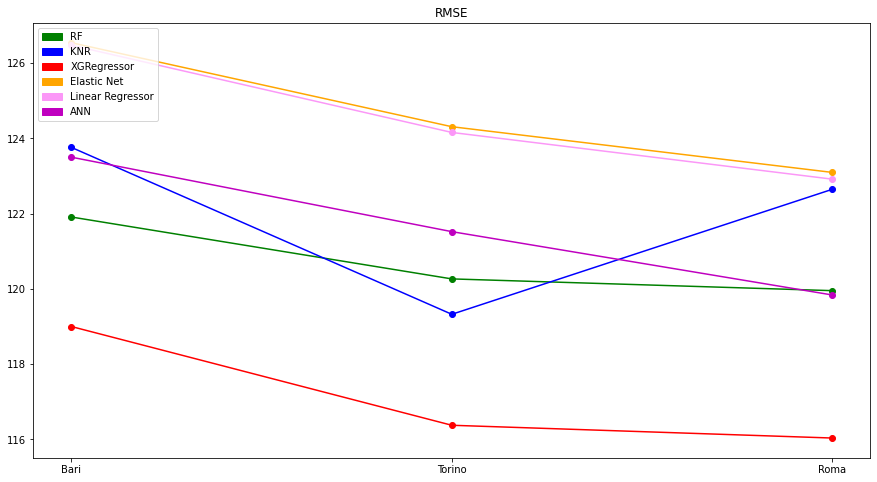

In [ ]:
#RMSE
plt.figure(figsize = (15,8))
plt.plot(city, MSEArrRF, 'bo-', color = 'green')
plt.plot(city, MSEArrKNR, 'bo-', color = 'blue')
plt.plot(city, MSEArrXG, 'bo-', color = 'red')
plt.plot(city, MSEArrENQ, 'bo-', color = 'orange')
plt.plot(city, MSEArrLRQ, 'bo-', color = '#FB97F7')
plt.plot(city, MSEArrANN, 'bo-', color = 'm')
plt.title("RMSE")
RF = mpatches.Patch(color='green', label='RF')
KNR = mpatches.Patch(color='blue', label='KNR')
XG = mpatches.Patch(color='red', label='XGRegressor')
EN = mpatches.Patch(color='orange', label='Elastic Net')
LR = mpatches.Patch(color='#FB97F7', label='Linear Regressor')
ANN = mpatches.Patch(color='m', label='ANN')
plt.legend(handles=[RF, KNR, XG, EN, LR, ANN], loc = 'upper left', fontsize = 10)
plt.show()

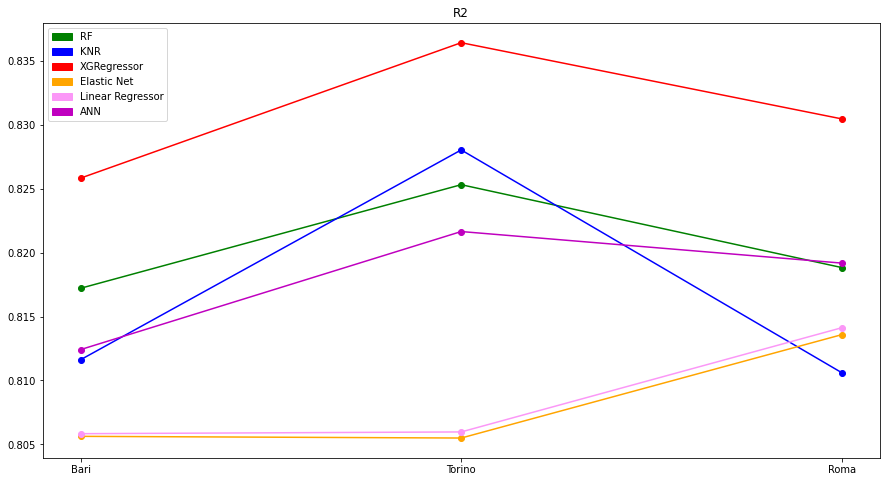

In [ ]:
#R2
plt.figure(figsize = (15,8))
plt.plot(city, R2ArrRF, 'bo-', color = 'green')
plt.plot(city, R2ArrKNR, 'bo-', color = 'blue')
plt.plot(city, R2ArrXG, 'bo-', color = 'red')
plt.plot(city, R2ArrENQ, 'bo-', color = 'orange')
plt.plot(city, R2ArrLRQ, 'bo-', color = '#FB97F7')
plt.plot(city, R2ArrANN, 'bo-', color = 'm')
plt.title("R2")
RF = mpatches.Patch(color='green', label='RF')
KNR = mpatches.Patch(color='blue', label='KNR')
XG = mpatches.Patch(color='red', label='XGRegressor')
EN = mpatches.Patch(color='orange', label='Elastic Net')
LR = mpatches.Patch(color='#FB97F7', label='Linear Regressor')
ANN = mpatches.Patch(color='m', label='ANN')
plt.legend(handles=[RF, KNR, XG, EN, LR, ANN], loc = 'best', fontsize = 10)
plt.show()

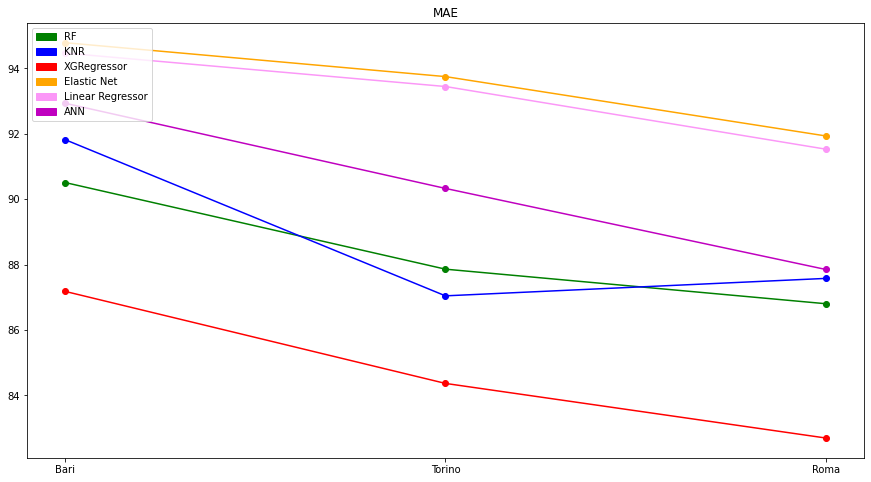

In [ ]:
#MAE
plt.figure(figsize = (15,8))
plt.plot(city, MAEArrRF, 'bo-', color = 'green')
plt.plot(city, MAEArrKNR, 'bo-', color = 'blue')
plt.plot(city, MAEArrXG, 'bo-', color = 'red')
plt.plot(city, MAEArrENQ, 'bo-', color = 'orange')
plt.plot(city, MAEArrLRQ, 'bo-', color = '#FB97F7')
plt.plot(city, MAEArrANN, 'bo-', color = 'm')
plt.title("MAE")
RF = mpatches.Patch(color='green', label='RF')
KNR = mpatches.Patch(color='blue', label='KNR')
XG = mpatches.Patch(color='red', label='XGRegressor')
EN = mpatches.Patch(color='orange', label='Elastic Net')
LR = mpatches.Patch(color='#FB97F7', label='Linear Regressor')
ANN = mpatches.Patch(color='m', label='ANN')
plt.legend(handles=[RF, KNR, XG, EN, LR, ANN], loc = 'upper left', fontsize = 10)
plt.show()

#Plot RMSE score for each city 

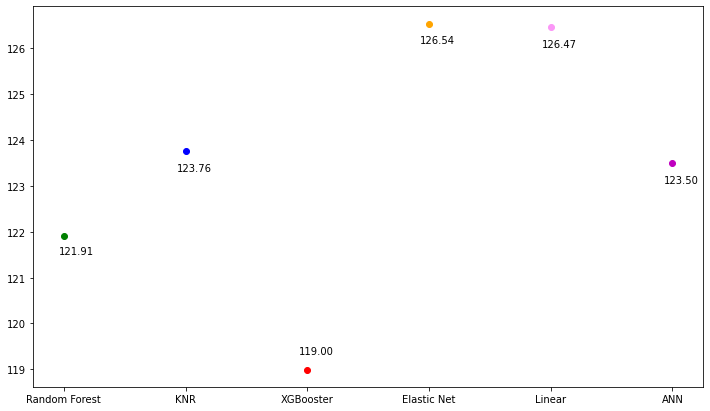

In [ ]:
#Bari graph
models = ['Random Forest', 'KNR', 'XGBooster', 'Elastic Net', 'Linear', 'ANN']
plt.figure(figsize = (12,7))
plt.plot(models[0], resultBariRF[1], 'o', color = 'green')
plt.plot(models[1], resultBariKNR[1], 'o', color = 'blue')
plt.plot(models[2], resultBariXG[1], 'o', color = 'red')
plt.plot(models[3], resultBariENQ[1], 'o', color = 'orange')
plt.plot(models[4], resultBariLRQ[1], 'o', color = '#FB97F7')
plt.plot(models[5], resultBariANN[1], 'o', color = 'm')
plt.annotate(("{:.2f}".format(resultBariRF[1])),(models[0],resultBariRF[1]), textcoords='offset pixels', xytext=(30,-18), ha='right')
plt.annotate(("{:.2f}".format(resultBariKNR[1])),(models[1],resultBariKNR[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultBariXG[1])),(models[2],resultBariXG[1]), textcoords='offset pixels', xytext=(26,15), ha='right')
plt.annotate(("{:.2f}".format(resultBariENQ[1])),(models[3],resultBariENQ[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultBariLRQ[1])),(models[4],resultBariLRQ[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultBariANN[1])),(models[5],resultBariANN[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.show()

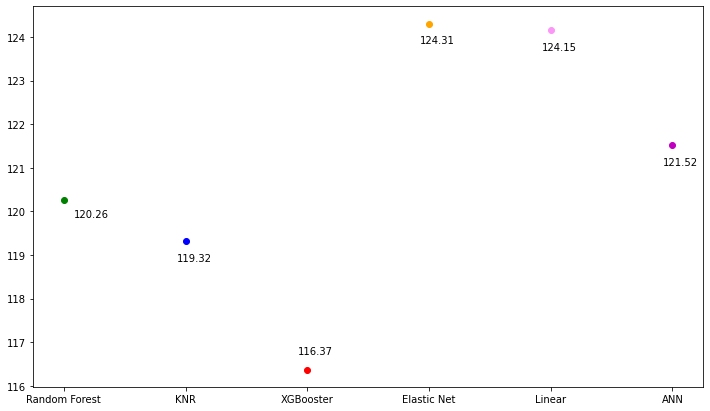

In [ ]:
#Torino graph
models = ['Random Forest', 'KNR', 'XGBooster', 'Elastic Net', 'Linear', 'ANN']
plt.figure(figsize = (12,7))
plt.plot(models[0], resultTorinoRF[1], 'o', color = 'green')
plt.plot(models[1], resultTorinoKNR[1], 'o', color = 'blue')
plt.plot(models[2], resultTorinoXG[1], 'o', color = 'red')
plt.plot(models[3], resultTorinoENQ[1], 'o', color = 'orange')
plt.plot(models[4], resultTorinoLRQ[1], 'o', color = '#FB97F7')
plt.plot(models[5], resultTorinoANN[1], 'o', color = 'm')
plt.annotate(("{:.2f}".format(resultTorinoRF[1])),(models[0],resultTorinoRF[1]), textcoords='offset pixels', xytext=(45,-17), ha='right')
plt.annotate(("{:.2f}".format(resultTorinoKNR[1])),(models[1],resultTorinoKNR[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultTorinoXG[1])),(models[2],resultTorinoXG[1]), textcoords='offset pixels', xytext=(26,15), ha='right')
plt.annotate(("{:.2f}".format(resultTorinoENQ[1])),(models[3],resultTorinoENQ[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultTorinoLRQ[1])),(models[4],resultTorinoLRQ[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultTorinoANN[1])),(models[5],resultTorinoANN[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.show()

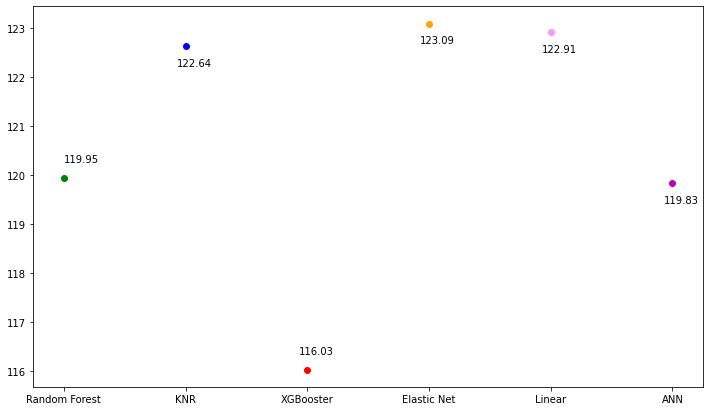

In [ ]:
#Roma graph
models = ['Random Forest', 'KNR', 'XGBooster', 'Elastic Net', 'Linear', 'ANN']
plt.figure(figsize = (12,7))
plt.plot(models[0], resultRomaRF[1], 'o', color = 'green')
plt.plot(models[1], resultRomaKNR[1], 'o', color = 'blue')
plt.plot(models[2], resultRomaXG[1], 'o', color = 'red')
plt.plot(models[3], resultRomaENQ[1], 'o', color = 'orange')
plt.plot(models[4], resultRomaLRQ[1], 'o', color = '#FB97F7')
plt.plot(models[5], resultRomaANN[1], 'o', color = 'm')
plt.annotate(("{:.2f}".format(resultRomaRF[1])),(models[0],resultRomaRF[1]), textcoords='offset pixels', xytext=(35,15), ha='right')
plt.annotate(("{:.2f}".format(resultRomaKNR[1])),(models[1],resultRomaKNR[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultRomaXG[1])),(models[2],resultRomaXG[1]), textcoords='offset pixels', xytext=(26,15), ha='right')
plt.annotate(("{:.2f}".format(resultRomaENQ[1])),(models[3],resultRomaENQ[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultRomaLRQ[1])),(models[4],resultRomaLRQ[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.annotate(("{:.2f}".format(resultRomaANN[1])),(models[5],resultRomaANN[1]), textcoords='offset pixels', xytext=(26,-20), ha='right')
plt.show()